In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np
from numpy import load
import scipy
import matplotlib.pyplot as plt
from scipy.special import legendre
from numpy.linalg import svd

from time import time

import pandas as pd



In [2]:
from joblib import Parallel, delayed

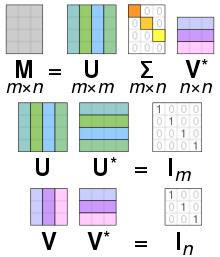

In [3]:
x = np.linspace(-1,1,5000)
df = pd.DataFrame(index=range(1,13), columns=range(1,13))
""" checking orthogonality of legendre polynomials 
    using the inner product of the polynomials
    >>> for i=j, the inner product is 1
    >>> for i!=j, the inner product must be 0
"""
for i in range(0,12):
    for j in range(0,12):
        n1=np.linalg.norm(legendre(i)(x))
        n2=np.linalg.norm(legendre(j)(x))
        df.iloc[i,j] = np.sum(legendre(i)(x)*legendre(j)(x))/(n1*n2)
df

1         2         3         4         5         6         7   \
1        1.0       0.0  0.000447       0.0    0.0006      -0.0  0.000721   
2        0.0       1.0      -0.0  0.000916      -0.0  0.001149      -0.0   
3   0.000447      -0.0       1.0      -0.0  0.001341      -0.0  0.001612   
4        0.0  0.000916      -0.0       1.0      -0.0  0.001755      -0.0   
5     0.0006      -0.0  0.001341      -0.0       1.0      -0.0  0.002163   
6       -0.0  0.001149      -0.0  0.001755      -0.0       1.0       0.0   
7   0.000721      -0.0  0.001612      -0.0  0.002163       0.0       1.0   
8       -0.0  0.001342      -0.0   0.00205       0.0   0.00257      -0.0   
9   0.000825      -0.0  0.001845      -0.0  0.002475      -0.0  0.002976   
10      -0.0  0.001512      -0.0  0.002309      -0.0  0.002895      -0.0   
11  0.000918       0.0  0.002052      -0.0  0.002754      -0.0  0.003311   
12       0.0  0.001665      -0.0  0.002543      -0.0  0.003188      -0.0   

          8         9         10        11        12  
1       -0.0  0.000825      -0.0  0.000918       0.0  
2   0.001342      -0.0  0.001512       0.0  0.001665  
3       -0.0  0.001845      -0.0  0.002052      -0.0  
4    0.00205      -0.0  0.002309      -0.0  0.002543  
5        0.0  0.002475      -0.0  0.002754      -0.0  
6    0.00257      -0.0  0.002895      -0.0  0.003188  
7       -0.0  0.002976      -0.0  0.003311      -0.0  
8        1.0      -0.0  0.003382      -0.0  0.003725  
9       -0.0       1.0      -0.0  0.003788      -0.0  
10  0.003382      -0.0       1.0      -0.0  0.004195  
11      -0.0  0.003788      -0.0       1.0      -0.0  
12  0.003725      -0.0  0.004195      -0.0       1.0

### img

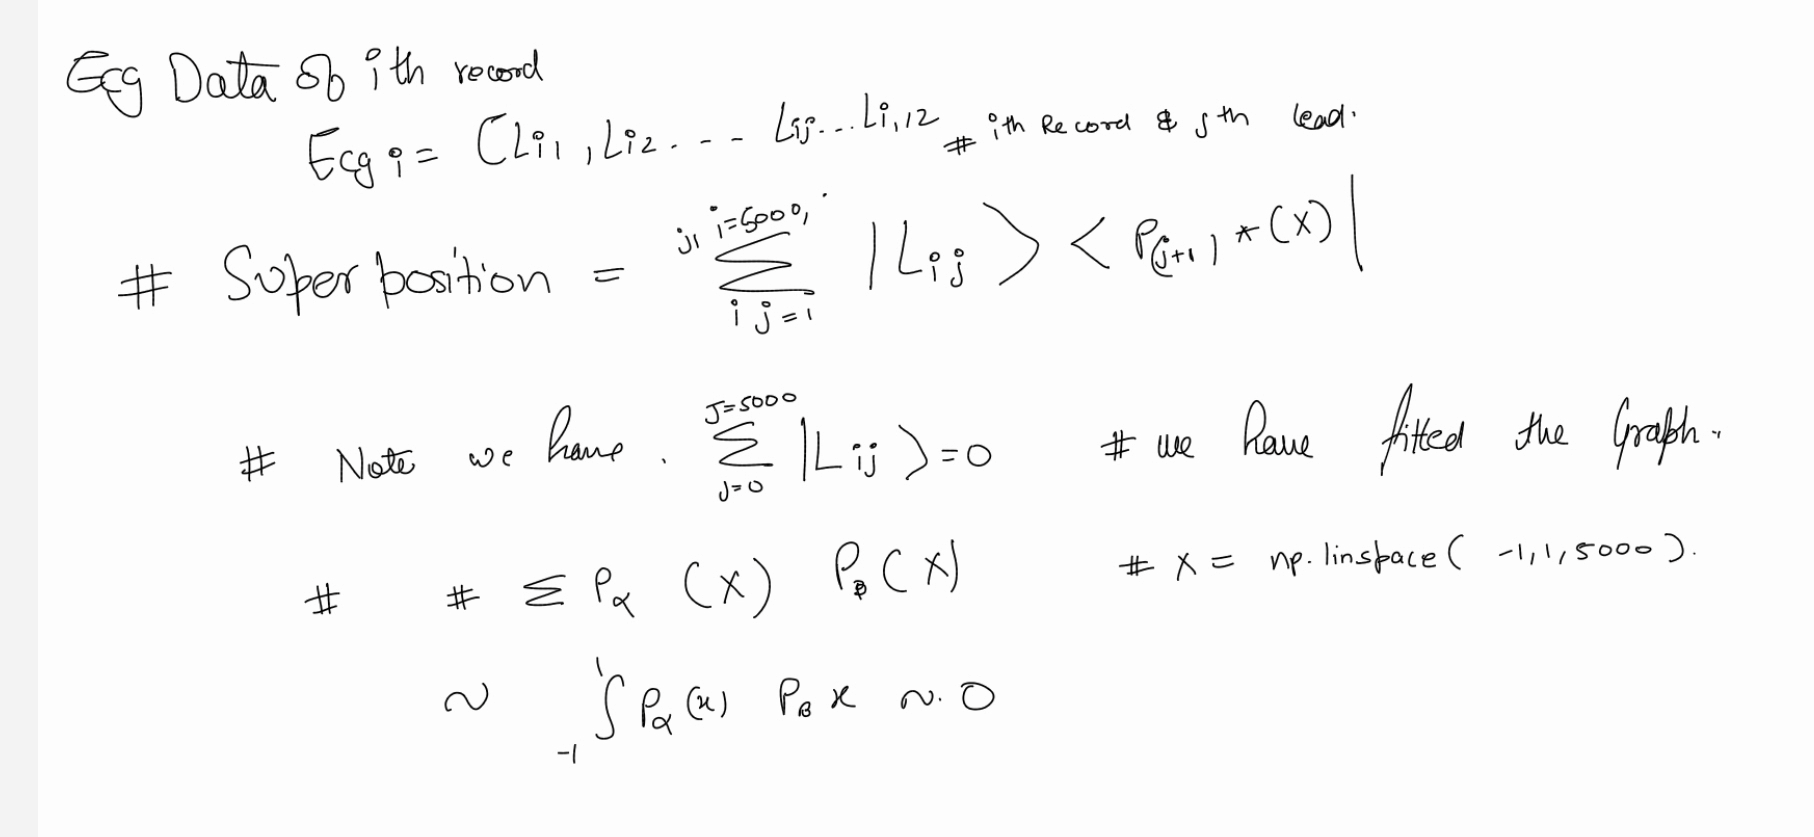

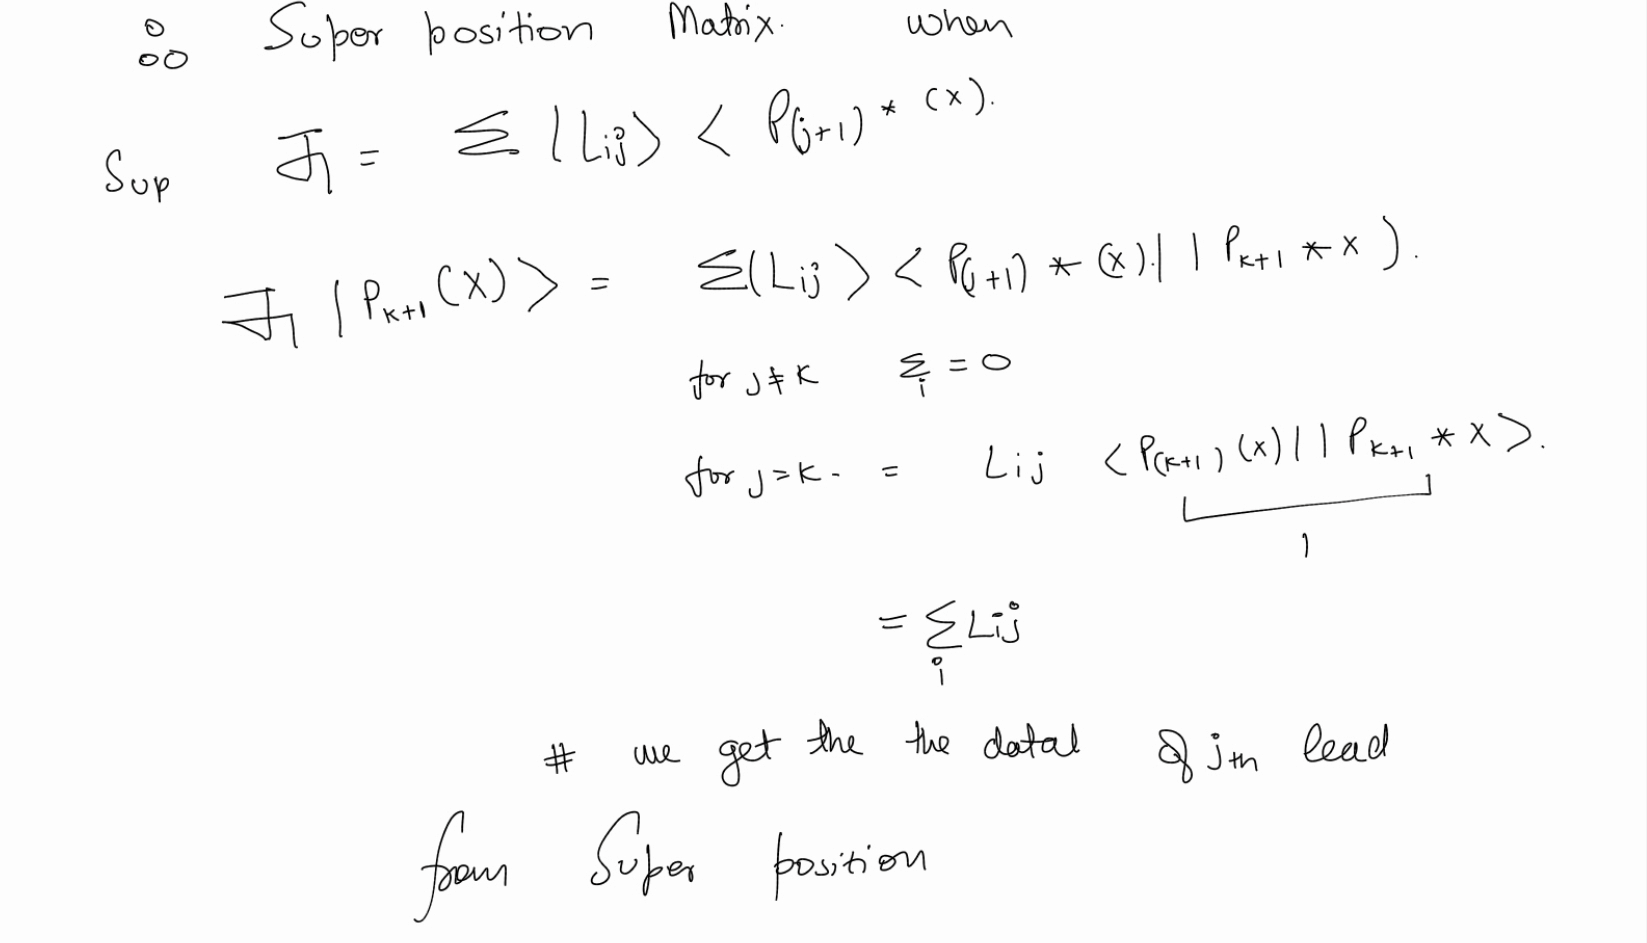

## def function


In [4]:
#DEF FUNCTION INPUT SHOULD BE ONLY INT GIVE SQUARE
import math
scale=StandardScaler()
def superposition(data: np.ndarray):# it will create super position of 12 lead ecg data 
    """
    This function takes a 5000 * 12 lead data and returns the superposition of the data.
    superpostion matrix multiplied by legendre(j+1)(x) we get the j-th column of the data matrix 
    or we can say the jth lead of the ecg data
    """
    scale=StandardScaler()
    scaled = scale.fit_transform(data)# normal distribution of each column of the data matrix # in-feature scaling
    sum=np.zeros((5000,5000))
    x = np.linspace(-1,1,5000)

    for i in range(data.shape[1]):
        leg=legendre(i+1)(x)
        norm=np.linalg.norm(leg)
        """ 
        >>I here added norm part pingal sir didnt done that
        you can remove norm """
        sum=sum+np.outer(data[:,i],#data is in shaPE OF 5000xDATA.shape[1] AN SHAPE[1] MEANS THE NUMBER OF COLUMNS
                         leg#legendre polinomial of order i+1 apllied to x p_n applies to matrix x
                         )/norm
        #outer product of the i-th column of the data matrix and the i-th legendre polynomial
        
    
    return sum

def singularvaluedecomposition(data):
    data_sup = superposition(data)
    a, data_svd, b = svd(data_sup)

    return data_svd

def normalize_matrix(matrix):
    """take input as 500*12 or a person report and return the normalized matrix 
    >>>sum of square of all the elements of the norm_matrix is 1"""
    
    matrix_norm = np.linalg.norm(matrix, 'fro')#frobenius norm is the square root of the sum of the absolute squares of its elements
                                                # works for 2d arrays
    if np.isnan(matrix_norm):# is NAN not a number 
        #it will return a matrix of zeros of the same shape as the input matrix
        return np.zeros_like(matrix)
    else:
        normalized_matrix = matrix / matrix_norm
        return normalized_matrix
    
def coarse_grain(data,f):
    """ 
    This function takes a 2D numpy array and an integer f as input and returns the coarse grained image of the data.
    which means that the data is divided into fxf blocks and the mean of each block is calculated and stored in a new matrix.
    or we can say we reduce the resolution of the image by a factor of f"""
    img = superposition(data)#superposition of the data

    s1=np.zeros((int(img.shape[0]/f)#shape[0] is the number of rows
                 ,int(img.shape[1]/f))#shape[1] is the number of columns
                 ) # Coarse grained image'

    for i in range(s1.shape[0]):# s1 is zero matrix of shape[0] rows and shape[1] columns
        for j in range(s1.shape[1]):
            s1[i,j]=np.mean(img[i*f:i*f+f,j*f:j*f+f]) # changing the value of the s1 zero matrix to the mean of the fxf block of the img matrix

    return s1

In [5]:
import os
os.getcwd()
# go one directory back
os.chdir("..")
os.getcwd()

'/home/karansingh/Documents/summer-term/KARAN_ECG'

## SR data graph

In [6]:
scale=StandardScaler()

data = load('data_prep/disease_SR.npy')
cc = coarse_grain(data[0],50)
data.shape

ft=scale.fit_transform(data[0])

sup=superposition(data[0])
len(cc[0])

norm=normalize_matrix(data[0])

In [7]:
data.shape

(5000, 5000, 12)

### plotting all 12 leads 

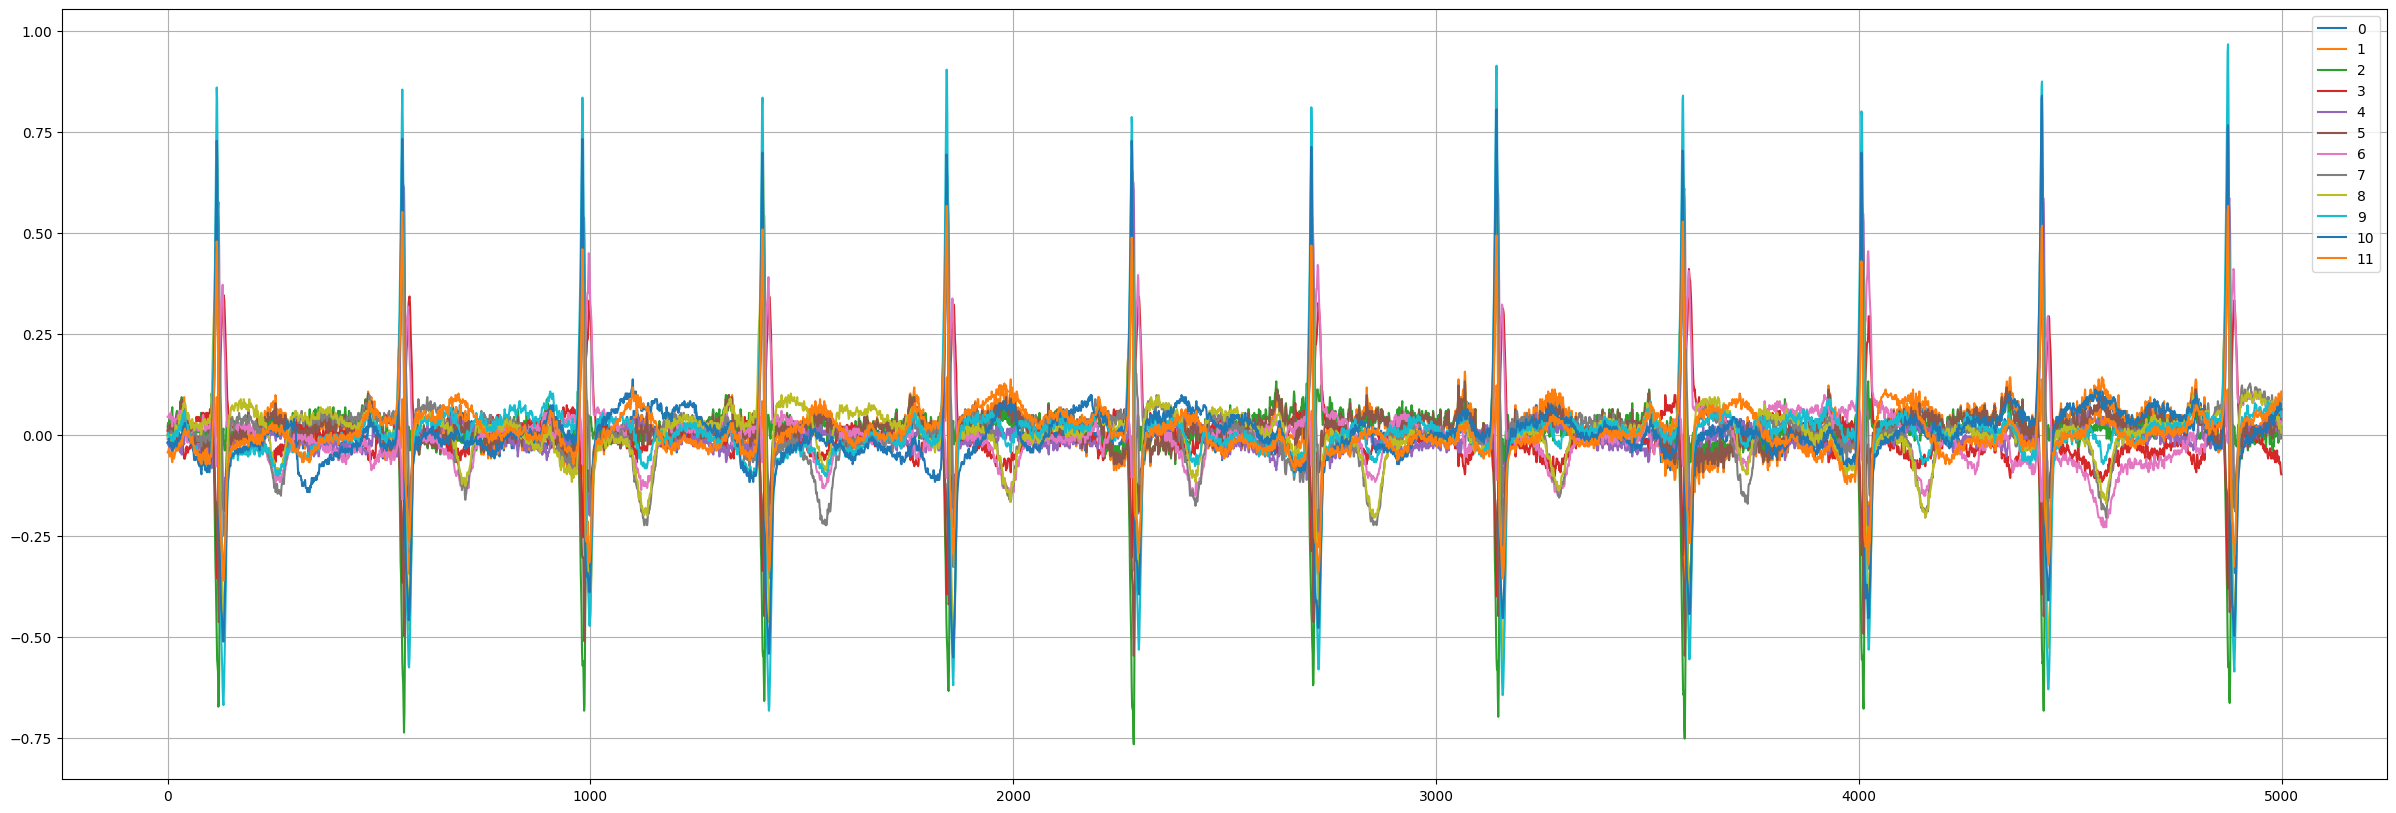

In [8]:
plt.figure(figsize=(30,10))
for i in range(0,12):
    # legends on graph

    plt.plot(data[0][:,i],label=f'{i}')


plt.grid(True)
plt.legend()
# Show the plot
plt.show() 

i am making graph for 1st gury who has the disease SR

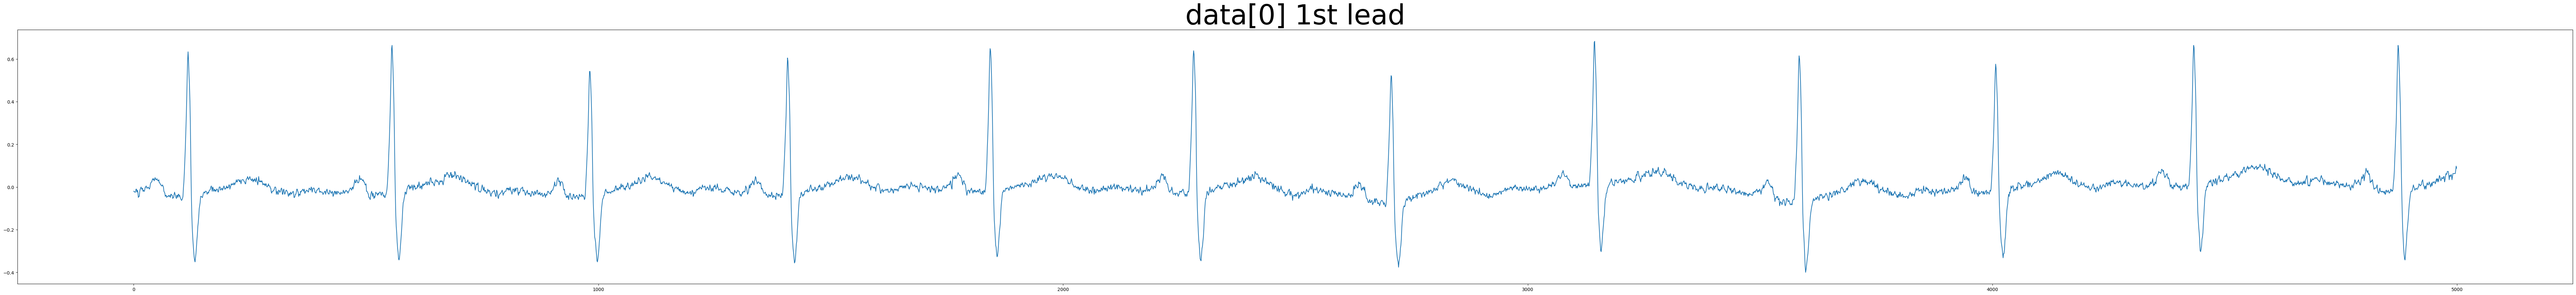

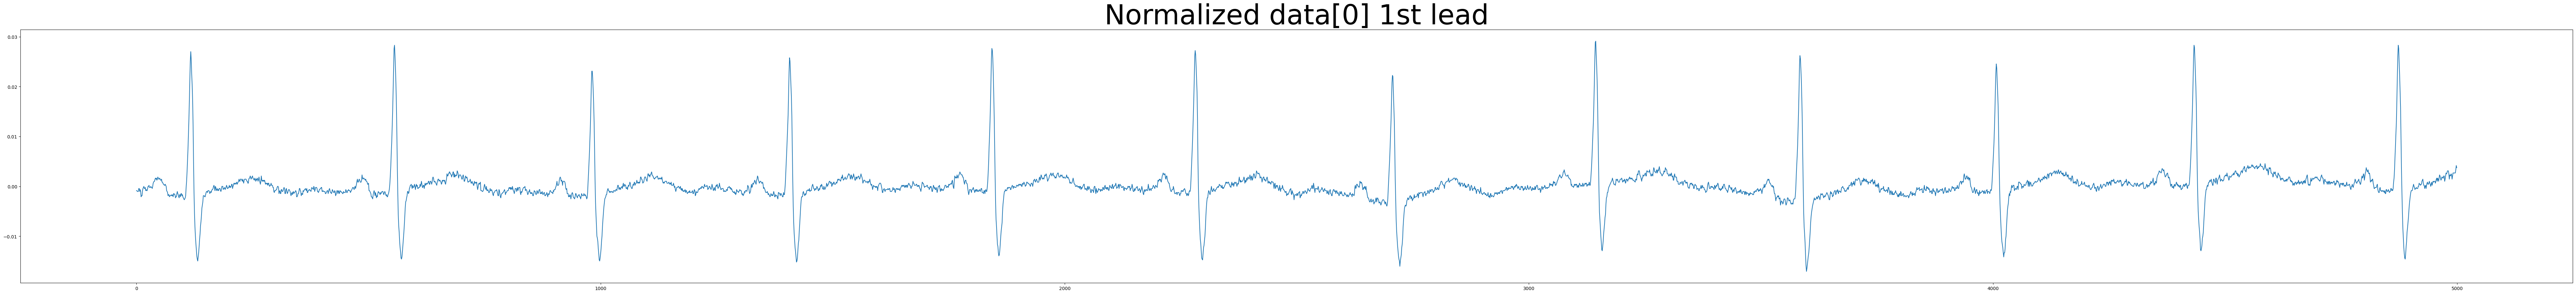

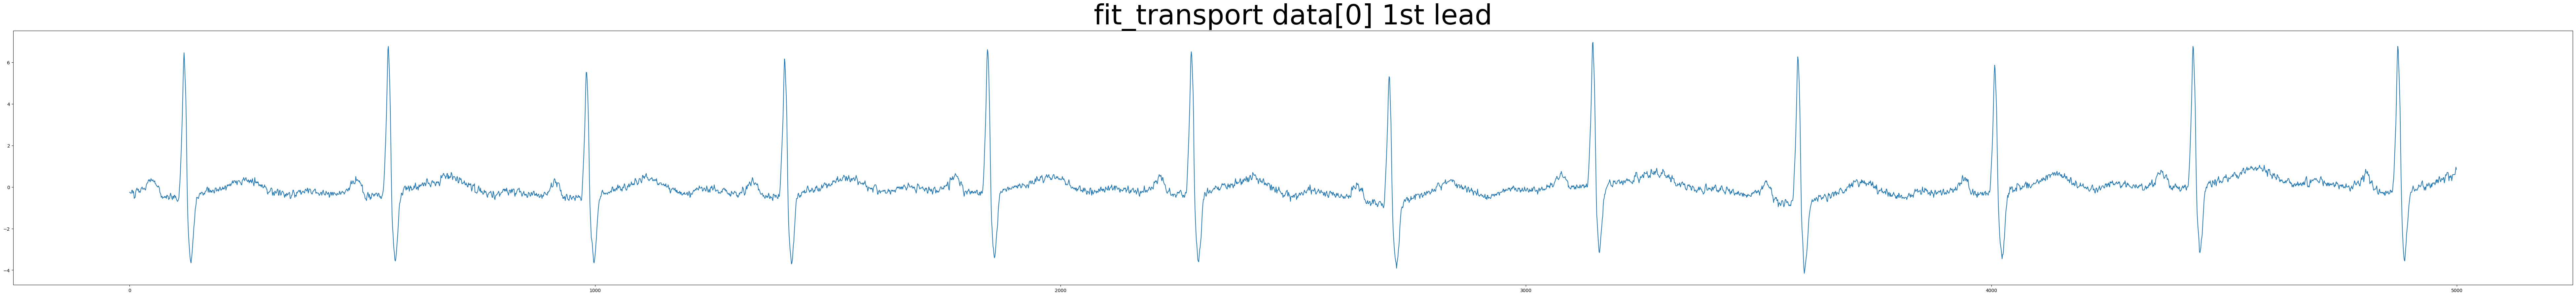

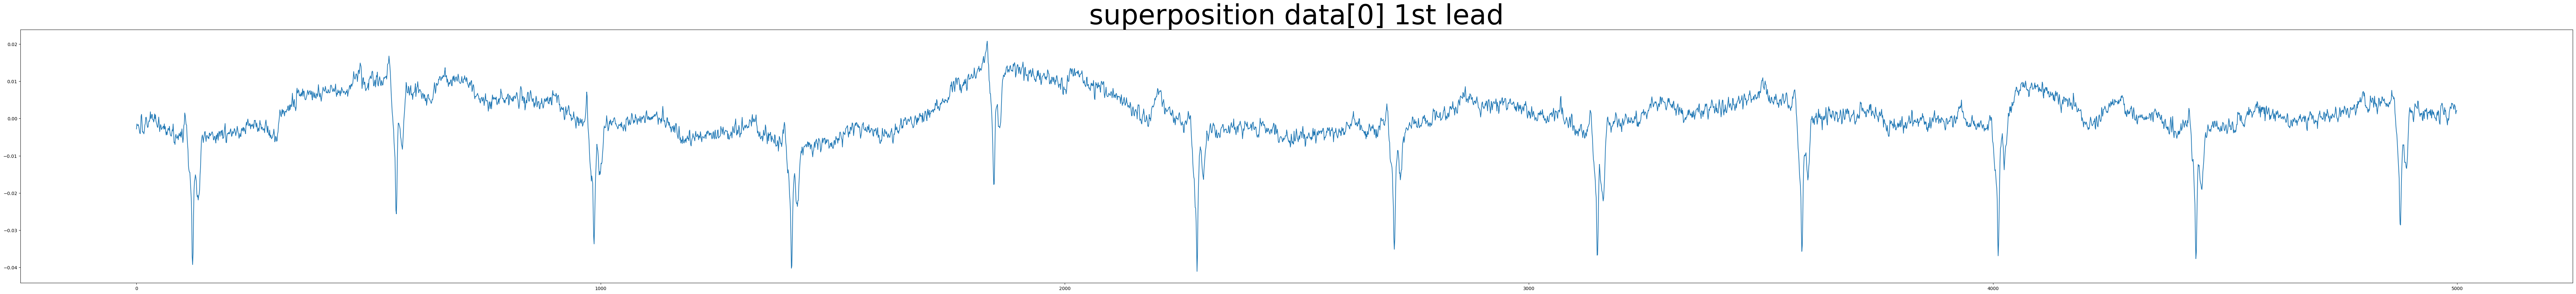

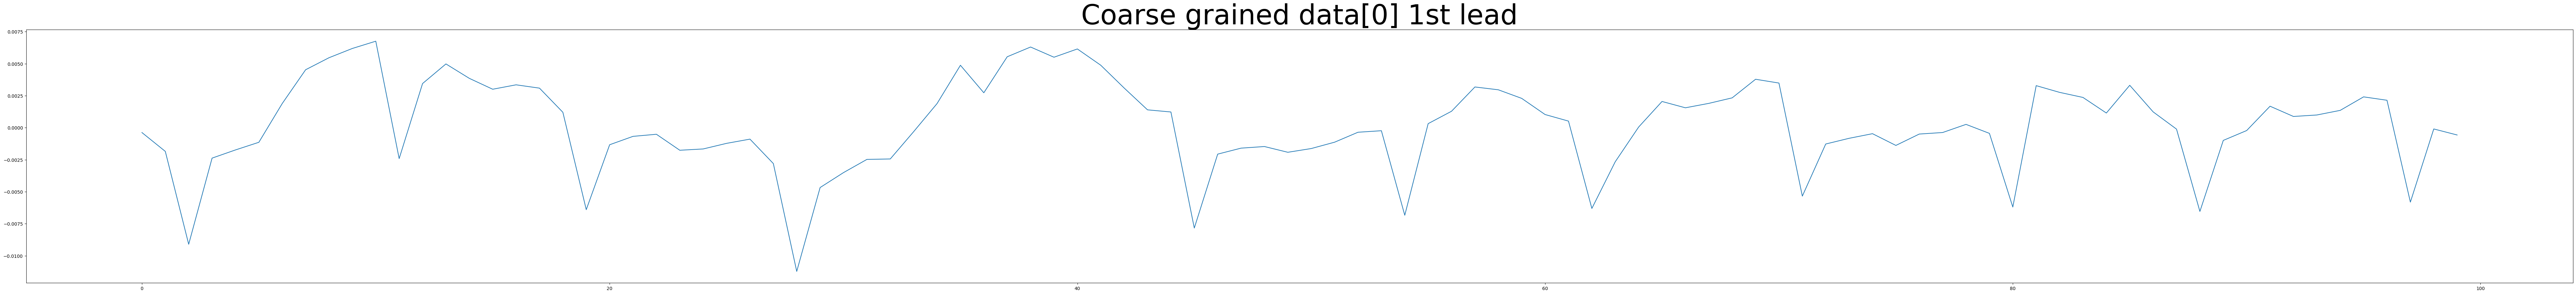

In [9]:
# graph data[0] x axis is index/10000 and y axis is the value of the data size 5000
plt.figure(figsize=(100,10))

plt.plot(data[0,:,0])# first person 1st lead
plt.title('data[0] 1st lead',fontsize=60)
plt.show()

plt.figure(figsize=(100,10))
plt.plot(norm[:,0]) # first person normalized 1st lead
plt.title('Normalized data[0] 1st lead',fontsize=60)
plt.show()

plt.figure(figsize=(100,10))
plt.plot(ft[:,0]) # first person normalized 1st lead
plt.title('fit_transport data[0] 1st lead',fontsize=60)
plt.show()

plt.figure(figsize=(100,10))
plt.plot(sup[:,0]) # superposition of the data[0] is a 5000*5000 matrix
""" >>ploting one column only of the superposition matrix  """
plt.title('superposition data[0] 1st lead',fontsize=60)
plt.show()


plt.figure(figsize=(100,10))
plt.plot(cc[:,0]) # coarse grained data[0] is a 100*100 matrix
plt.title('Coarse grained data[0] 1st lead',fontsize=60)
plt.show()



In [10]:
###### back
data.shape,data[0].shape,sup.shape,cc.shape

((5000, 5000, 12), (5000, 12), (5000, 5000), (100, 100))

In [11]:
np.savetxt('junk.txt',cc)
del cc,ft,norm,sup

## for ST disease graph

In [12]:
data = load('data_prep/disease_ST.npy')
cc = coarse_grain(data[0],50)
data.shape

ft=scale.fit_transform(data[0])

sup=superposition(data[0])
len(cc[0])

norm=normalize_matrix(data[0])

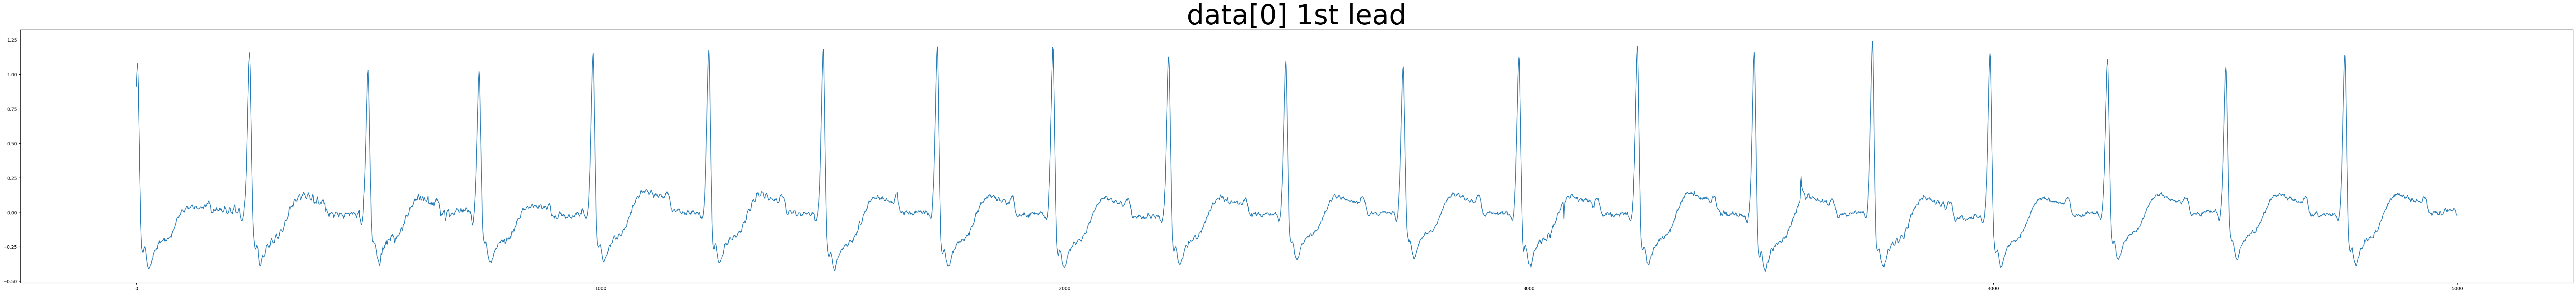

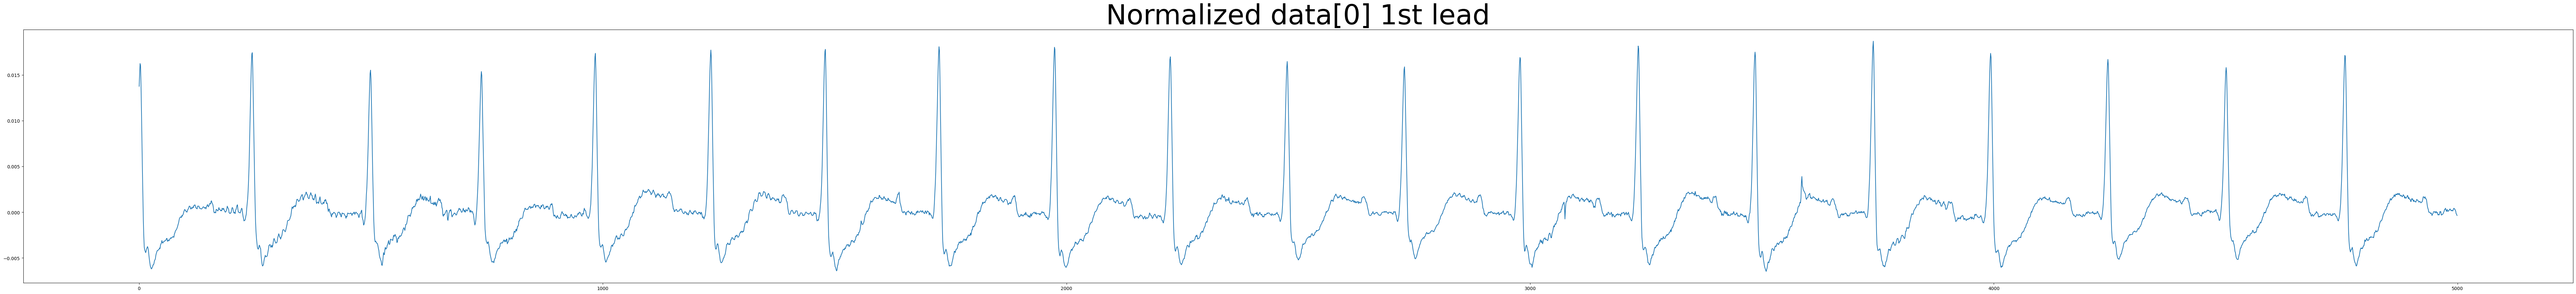

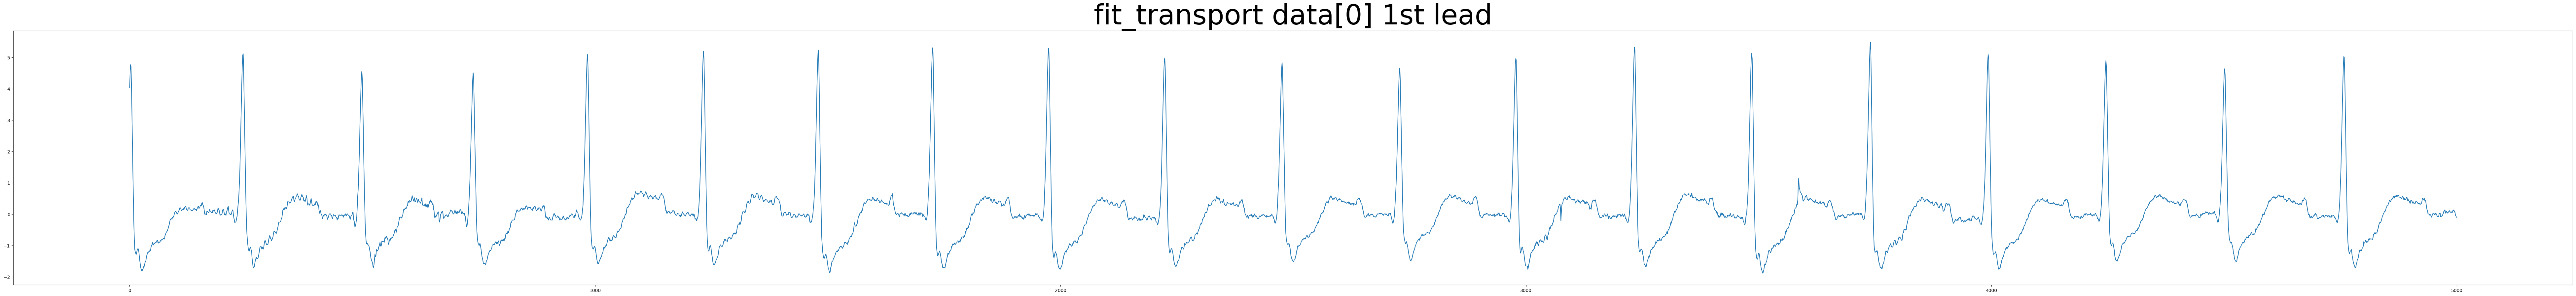

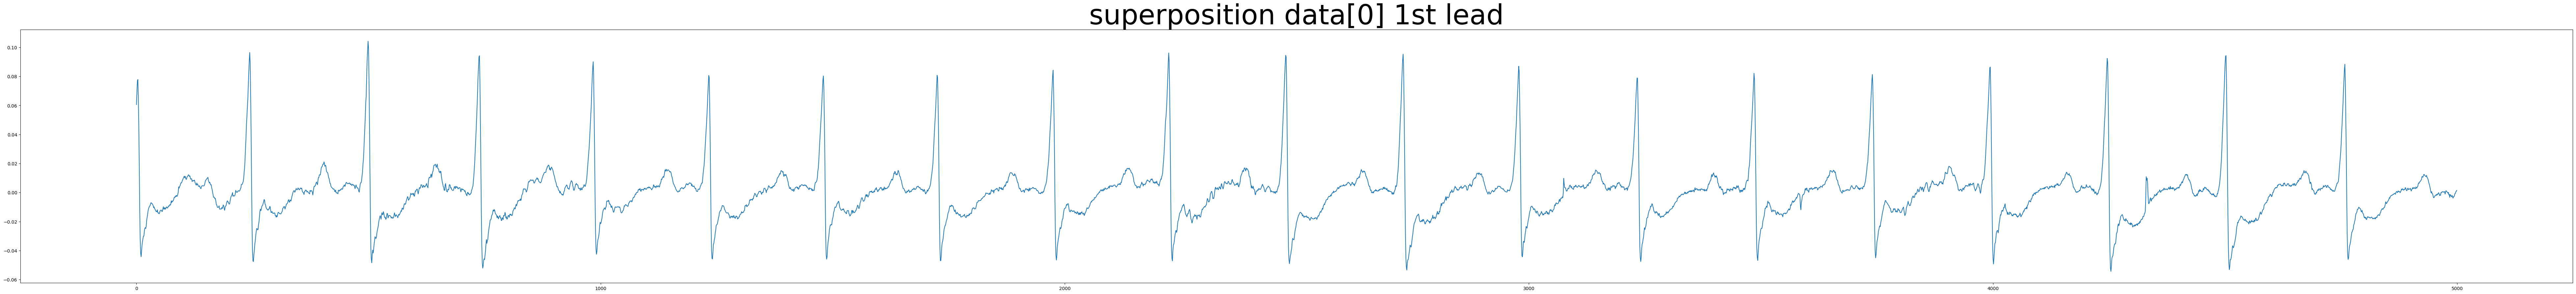

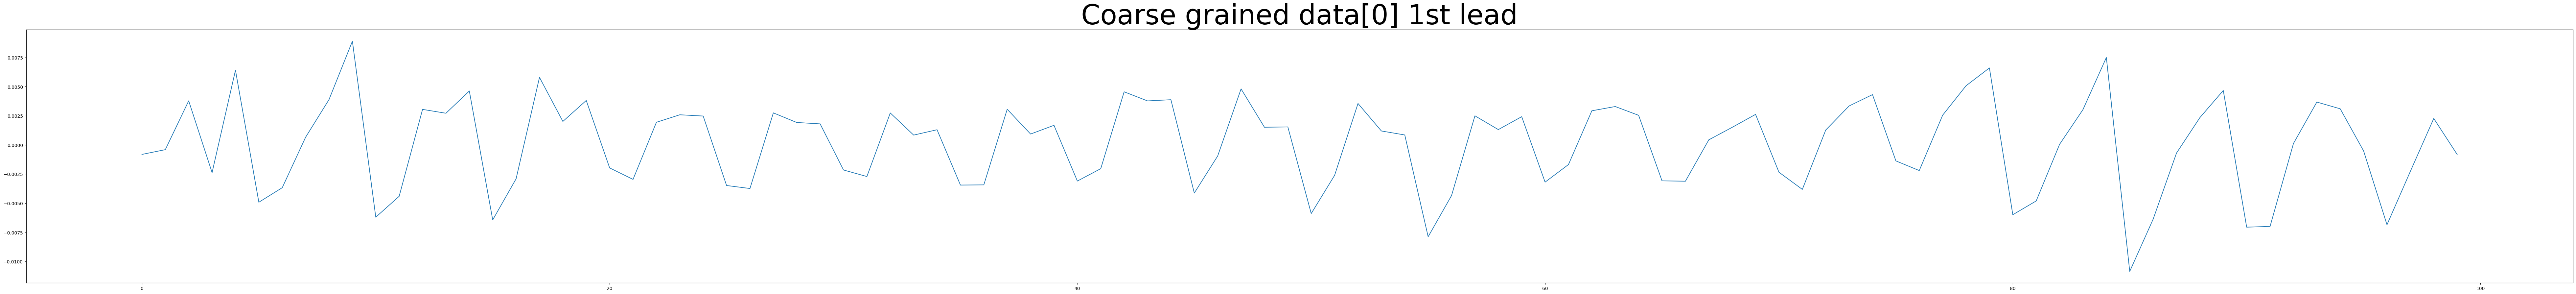

In [13]:
# graph data[0] x axis is index/10000 and y axis is the value of the data size 5000
plt.figure(figsize=(100,10))
plt.plot(data[0,:,0])
plt.title('data[0] 1st lead',fontsize=60)
plt.show()

plt.figure(figsize=(100,10))
plt.plot(norm[:,0])
plt.title('Normalized data[0] 1st lead',fontsize=60)
plt.show()

plt.figure(figsize=(100,10))
plt.plot(ft[:,0])
plt.title('fit_transport data[0] 1st lead',fontsize=60)
plt.show()

plt.figure(figsize=(100,10))
plt.plot(sup[:,0])
plt.title('superposition data[0] 1st lead',fontsize=60)
plt.show()


plt.figure(figsize=(100,10))
plt.plot(cc[:,0])
plt.title('Coarse grained data[0] 1st lead',fontsize=60)
plt.show()


In [14]:
del cc,ft,norm,sup

# Saving data

In [17]:
############################################################
    
#### SR_data

data = load('data_prep/disease_SR.npy')

split_number = 10
if len(data)%split_number == 0:# to split data in the 10 parts
    data_split = np.array_split(data,split_number)# numpy array of (5000, 5000, 12)
    ### data got splitted in (500, 5000, 12) each






for i in range(split_number):
    """
        500 report >>> normalised all 500 report >>> superposition >>> coarse grain >>> save 
    """
    cc = data_split[i] #each 500 data

    norm_matrix = []

    for j in range(len(cc)):# cc[j] give j th report consist of 5000x12 matrix
        # norm_matrix.append(cc[j]) # dummy line
        norm_matrix.append(normalize_matrix(cc[j])) # recheck this line
        """ 
        norm matrix is a list of normalised 5000x12 matrices of 500 reports from cc
        # len is 500
        """

        

    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs = 14)(delayed(coarse_grain)(x,50) for x in cc)
    end = time()

    print(end- start)

    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j])

    np.savetxt('disease_SR_svd' + '_'+str(i) + '.txt',cc)


In [18]:
k=np.random.randn(2,5)
np.savetxt('junk1.txt',k)


In [ ]:
############################################################
    
#### SB data
    
data = load('data_prep/disease_SB.npy')

split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)




for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        #norm_matrix.append(cc[j]) # dummy line
        norm_matrix.append(normalize_matrix(cc[j])) # oriignal line
    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs = 10)(delayed(coarse_grain)(x,50) for x in cc)
    end = time()

    print(end- start)
    results = np.array(results)# cross grained of 500 reports
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())
    np.savetxt('disease_SB_svd' + '_'+str(i) + '.txt',cc)



223.9517321586609
223.31726694107056
223.3905758857727
223.34452033042908
223.80978751182556
223.30324363708496
223.46729850769043
223.31667113304138
223.57152724266052
223.17007446289062


In [ ]:
############################################################
    
#### ST data
    
data = load('data_prep/disease_ST.npy')

split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)




for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        #norm_matrix.append(cc[j]) # dummy line
        norm_matrix.append(normalize_matrix(cc[j])) # recheck this line

    cc = norm_matrix
    
    start = time()
    results = Parallel(n_jobs = 14)(delayed(coarse_grain)(x,50) for x in cc)
    end = time()
    print(end- start)

    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())
    np.savetxt('disease_ST_svd' + '_'+str(i) + '.txt',cc)

220.86945295333862
220.61272478103638
220.85574531555176
220.78686618804932
220.76962065696716
221.03584384918213
220.77733492851257
221.0228796005249
220.66518688201904
220.86943006515503
